<a href="https://colab.research.google.com/github/bundickm/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Michael_Bundick_Sprint_Challenge_Unit1_Sprint4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
#import and alias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#pull our data into colab with wget
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

--2019-04-12 15:05:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [application/x-httpd-php]
Saving to: ‘crx.data’

crx.data            100%[===================>]  31.46K  --.-KB/s    in 0.03s   

2019-04-12 15:05:03 (1.02 MB/s) - ‘crx.data’ saved [32218/32218]



In [0]:
#read in the data and relable
credit = pd.read_csv('crx.data',
                     names=['A1','A2','A3','A4','A5','A6','A7','A8',
                            'A9','A10','A11','A12','A13','A14','A15','A16'])

In [20]:
#everything looks normal
credit.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [99]:
#still looks normal
credit.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0.0,f,g,260.0,0.0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2.0,t,g,200.0,394.0,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1.0,t,g,200.0,1.0,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0.0,f,g,280.0,750.0,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0.0,t,g,0.0,0.0,-


In [21]:
#we pulled the data correctly
credit.shape

(690, 16)

In [22]:
credit.isnull().sum() #no nulls, missing data represented as something else

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [24]:
credit['A1'].value_counts() #'?' is standing in for null

b    468
a    210
?     12
Name: A1, dtype: int64

In [25]:
#swap '?' for NaN
credit = credit.replace('?', np.NaN)
credit.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [26]:
#confirm that the continuous columns are not all float
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null object
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null object
A15    690 non-null int64
A16    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [0]:
#Cast all continuous columns as float
credit[['A2','A3','A8','A11','A14','A15']] = credit[['A2','A3','A8','A11','A14','A15']].astype('float')

In [31]:
#All continuous columns are now float
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null float64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null float64
A16    690 non-null object
dtypes: float64(6), object(10)
memory usage: 86.3+ KB


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
#split our data along A16's 2 values for ease of use during graphing and tests
approve = credit[credit['A16']=='+']
deny = credit[credit['A16']=='-']

''

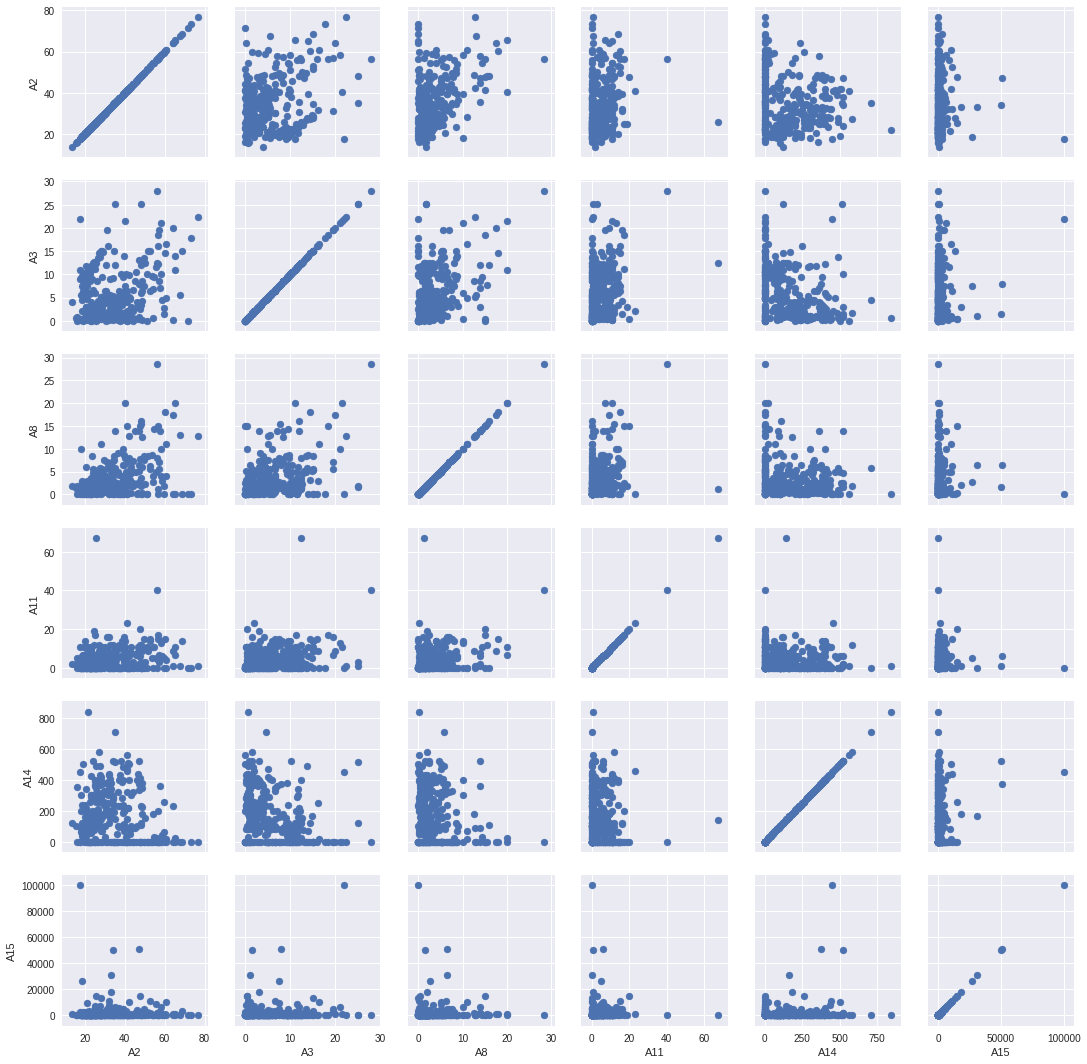

In [50]:
#quick and dirty look at what we are working with
sns.PairGrid(approve).map(plt.scatter);

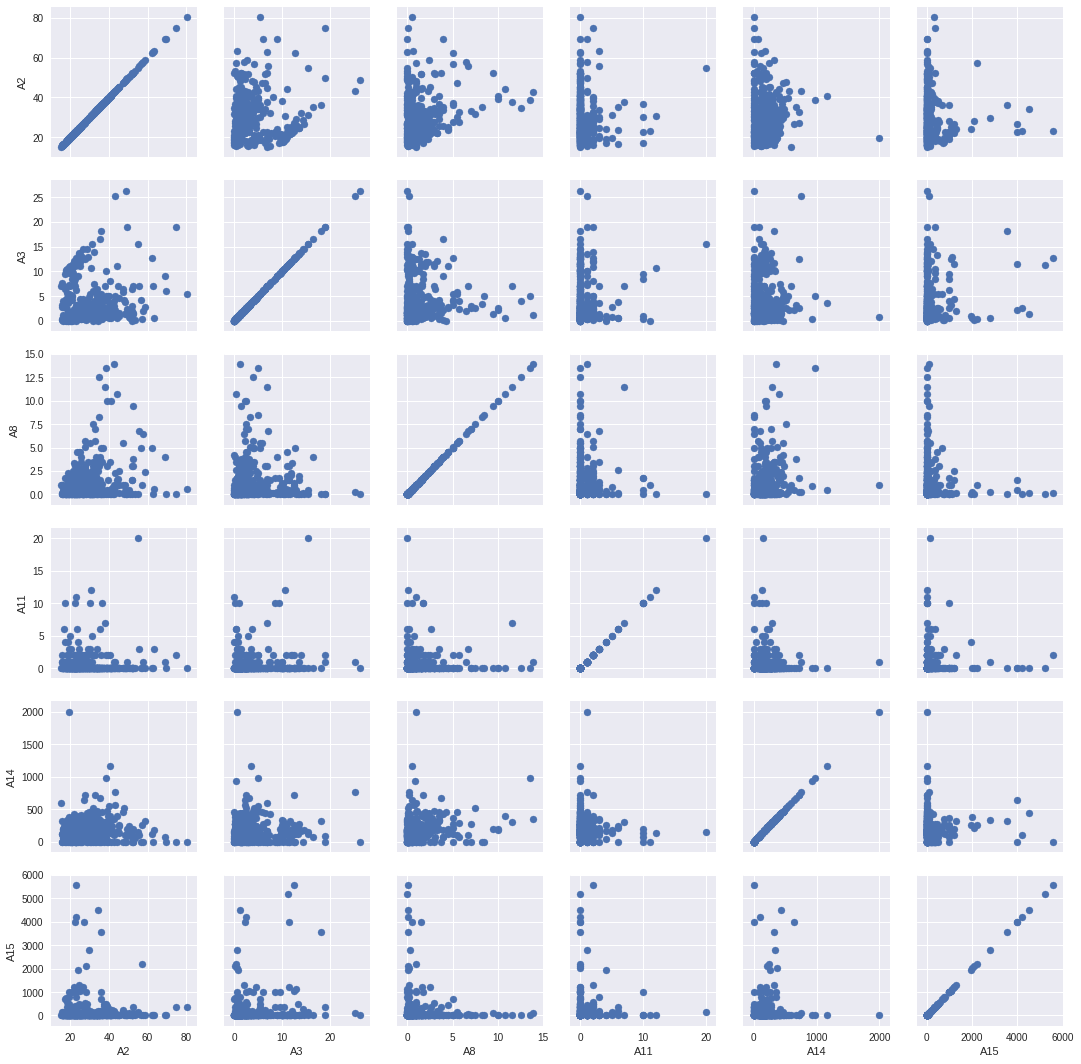

In [51]:
sns.PairGrid(deny).map(plt.scatter);

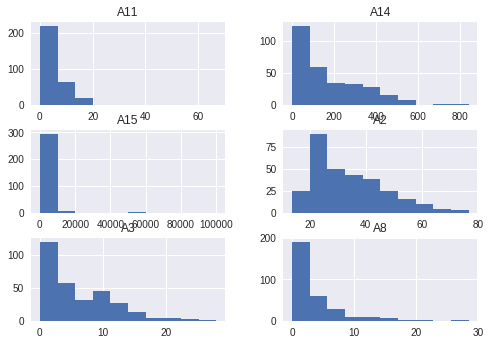

In [47]:
#another quick and dirty look at what we have
#looking for anything to pop out
approve.hist();

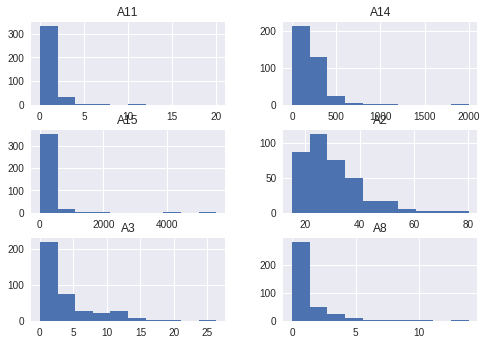

In [49]:
deny.hist();

In [57]:
#2-sample ttest all of the continuous variables at once
#looks like A11 has the biggest divergence and A14 has the smallest
for column in ['A2','A3','A8','A11','A14','A15']:
  print('Column:',column)
  print(stats.ttest_ind(approve[column],deny[column], nan_policy='omit'))

Column: A2
Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)
Column: A3
Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)
Column: A8
Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)
Column: A11
Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)
Column: A14
Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)
Column: A15
Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)
4.605863192182411 0.6318537859007833


In [58]:
#comparing means to check my reading of the test results
print(approve['A11'].mean(),deny['A11'].mean())
print(approve['A14'].mean(),deny['A14'].mean())

4.605863192182411 0.6318537859007833
164.421926910299 199.6994680851064


In [69]:
#do all the crosstabs and chi_squared tests at once
#A1: we fail to reject the null hypothesis that A1 and A16 are independent
#A9: we reject the null hypothesis that A9 and A16 are independent
for column in ['A1','A4','A5','A6','A7','A9','A10','A12','A13']:
  current_contingency = pd.crosstab(credit['A16'],credit[column])
  print(current_contingency)
  chi_squared, p_value, dof, expected = stats.chi2_contingency(current_contingency)
  print(f"Chi-Squared: {chi_squared}")
  print(f"P-value: {p_value}")
  print(f"Degrees of Freedom: {dof}") 
  print("Expected: \n", np.array(expected),'\n\n')

A1     a    b
A16          
+     98  206
-    112  262
Chi-Squared: 0.31128326491619945
P-value: 0.5768937883001117
Degrees of Freedom: 1
Expected: 
 [[ 94.15929204 209.84070796]
 [115.84070796 258.15929204]] 


A4   l    u    y
A16             
+    2  256   45
-    0  263  118
Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[  0.88596491 229.90789474  72.20614035]
 [  1.11403509 289.09210526  90.79385965]] 


A5     g  gg    p
A16              
+    256   2   45
-    263   0  118
Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[229.90789474   0.88596491  72.20614035]
 [289.09210526   1.11403509  90.79385965]] 


A6   aa   c  cc   d   e  ff   i  j   k   m   q  r   w   x
A16                                                      
+    19  62  29   7  14   7  14  3  14  16  51  2  33  32
-    35  75  12  23  11  46  45  7  37  22  27  1  31   6
Chi-Squared: 98.32520342679135
P-value: 3.499

###Side Exploration: A4 and A5 look like they might be near identical

In [103]:
#A4 and A5 have identical chi squared tests, let's take a look
test = credit[['A4','A5']].copy()
#definitely look the same 'u'='g', 'y'='p'
test.head()

,A4,A5
0,u,g
1,u,g
2,u,g
3,u,g
4,u,g


In [106]:
#pretty darn close
test_table = pd.crosstab(test['A4'],test['A5'])
test_table

A5,g,gg,p
A4,,,
l,0,2,0
u,519,0,0
y,0,0,163


In [109]:
#And chi-squared agrees that they are the same
chi_squared, p_value, dof, expected = stats.chi2_contingency(test_table)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected),'\n\n')

Chi-Squared: 1368.0
P-value: 6.001571019304877e-295
Degrees of Freedom: 4
Expected: 
 [[1.51754386e+00 5.84795322e-03 4.76608187e-01]
 [3.93802632e+02 1.51754386e+00 1.23679825e+02]
 [1.23679825e+02 4.76608187e-01 3.88435673e+01]] 




In [111]:
#6 NaN's each, even that is the same
test['A4'].value_counts(dropna=False)

u      519
y      163
NaN      6
l        2
Name: A4, dtype: int64

In [112]:
test['A5'].value_counts(dropna=False)

g      519
p      163
NaN      6
gg       2
Name: A5, dtype: int64

# Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

##T-Tests

###T-Test 1: A11
I used `t-test_ind` to test whether the average value differs significantly between the two samples - `approve` and `deny`. The near 0 p-value means we can reject the null hypothesis of identical average values, while the statistic of 11.667 indicates a relatively large divergence in average value (based on magnitude of statistic) and that `approve` has the higher average value (positive value for statistic).

In [70]:
stats.ttest_ind(approve['A11'],deny['A11'], nan_policy='omit')

Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)

We can confirm our interpretation by looking at the mean of both `approve['A11']` and `deny['A11]`

In [71]:
print('Approve Mean:', approve['A11'].mean())
print('Deny Mean:', deny['A11'].mean())

Approve Mean: 4.605863192182411
Deny Mean: 0.6318537859007833


As expected, a relatively large difference between the two means with `Approve` having the larger value.

###T-Test 2: A14
Once again, we use `ttest_ind`, and find a relatively small, but statistically significant, difference between the average values of `approve['A14']` and `deny['A14']`.  Our p-value is still less than .05 and thus we are unable to reject our null hypothesis of identical average values. Statistic is now negative and smaller (compared to above) - if our interpretation holds true that should me a relatively small difference in mean with `deny['A14']` having the larger mean.

In [72]:
stats.ttest_ind(approve['A14'],deny['A14'], nan_policy='omit')

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

We confirm our assesment and see relatively close means and `deny['A14']` having the large value, both as we expected.

In [73]:
print('Approve Mean:', approve['A14'].mean())
print('Deny Mean:', deny['A14'].mean())

Approve Mean: 164.421926910299
Deny Mean: 199.6994680851064


##Chi-Squared Tests

###Chi-Squared Test 1: A1
I use the `chi2_contigency` to run a chi-squared test on `A16` and `A1`, testing the null hypothesis that they are independent.  The returned p-value of .57 is larger than .05 and so we fail to reject the null hypothesis.

In [90]:
contingency_table = pd.crosstab(credit['A16'],credit['A1'])
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table, correction=True)
print(f"P-value: {p_value}")

P-value: 0.5768937883001117


Looking at the contingency table we can visually check to confirm `a` and `b` don't appear to be dependent on `+` or `-`.

In [91]:
print(contingency_table)

A1     a    b
A16          
+     98  206
-    112  262


We can also make a visual comparison between our contingency table and the expected table (what we should see if independent) to further confirm our assesment. We can see the expected and contingency tables are pretty similar.

In [92]:
print(expected)

[[ 94.15929204 209.84070796]
 [115.84070796 258.15929204]]


###Chi-Squared Test 2: A9
I use the `chi2_contigency` to run a chi-squared test on `A16` and `A9`, testing the null hypothesis that they are independent.  The returned p-value is near 0 so we reject the null hypothesis.

In [93]:
contingency_table = pd.crosstab(credit['A16'],credit['A9'])
chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table, correction=True)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")

Chi-Squared: 355.2038167412799
P-value: 3.1185900878457007e-79


Looking at the contingency table we can visually check to confirm `a` and `b` appear to be dependent on `+` or `-`. 

In [94]:
print(contingency_table)

A9     f    t
A16          
+     23  284
-    306   77


Once again, check against the expected table and see quite a large difference between it and the contingency table.

In [95]:
print(expected)

[[146.38115942 160.61884058]
 [182.61884058 200.38115942]]


##What was the most challenging part of this sprint challenge?
The most challenging part was simply making sure I had the wording right  when interpreting the results so I don't state something the tests may imply but don't actually test for.